# 최적화 함수 (Optimizer)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 간단한 SGD

In [2]:
# data sample 만들기
data_sample = np.random.uniform(-2, 2, size=10)

# loss 함수
def loss(x):
    return x ** 2

# 기울기 구할 수 있는 미분 함수 
def gradient(x):
    return 2 * x

In [3]:
# SGD 함수 만들기
def sgd(lr=0.1, epochs=10):
    # 처음 시작할 때 임의의 값 가중치 설정
    w = np.random.uniform(-2, 2)

    # 가중치 변화 양상 확인용
    history = [w]

    for _ in range(epochs):
        sample = np.random.choice(data_sample)  
        grad = gradient(sample)     # 손실함수에 대한 기울기
        w -= lr * grad              # 가중치 업데이트
        history.append(w)

    return history

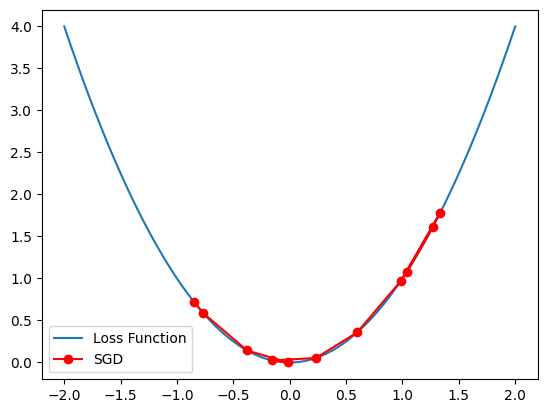

In [4]:
# history 시각화
history = sgd()
x_vals = np.linspace(-2, 2, 100)

plt.plot(x_vals, loss(x_vals), label='Loss Function')
plt.plot(history, loss(np.array(history)), 'ro-', label='SGD')

plt.legend()
plt.show()

### 모멘텀 추가 (확률적 경사하강법에 모멘텀 추가)

In [5]:
# 모멘텀 함수 만들기
def sgd_momentum(lr=0.1, momentum=0.9, epochs=10):      # 모멘텀 계수 추가
    # 처음 시작할 때 임의의 값 가중치 설정
    w = np.random.uniform(-2, 2)
    v = 0   # 속도

    # 가중치 변화 양상 확인용
    history = [w]

    for _ in range(epochs):
        sample = np.random.choice(data_sample)  
        grad = gradient(sample)         # 손실함수에 대한 기울기
        v = momentum * v - lr * grad    # 속도 업데이트 
        w += v                          # 가중치 업데이트
        history.append(w)

    return history

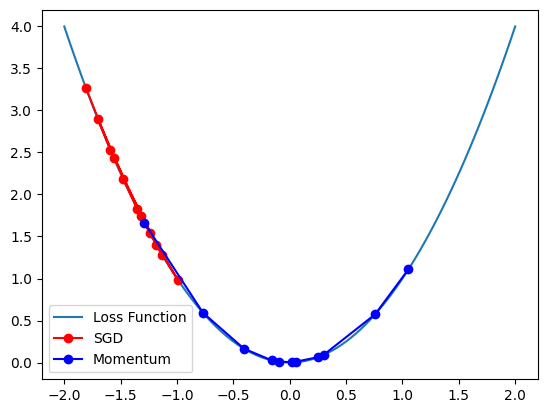

In [6]:
# SGD vs 모멘텀 시각화
sgd_history = sgd()
momentum_history = sgd_momentum()

x_vals = np.linspace(-2, 2, 100)

plt.plot(x_vals, loss(x_vals), label="Loss Function")
plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label="SGD")
plt.plot(momentum_history, loss(np.array(momentum_history)), 'bo-', label="Momentum")

plt.legend()
plt.show()

# 모멘텀이 훨씬 더 큰 폭으로 이동

### 학습률에 따른 SGD

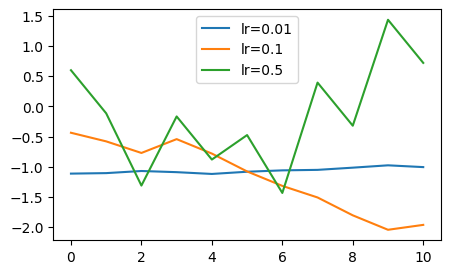

In [7]:
learning_rates = [0.01, 0.1, 0.5]
histories= [sgd(lr=lr) for lr in learning_rates]

plt.figure(figsize=(5,3))
for i, history in enumerate(histories):
    plt.plot(history, label=f'lr={learning_rates[i]}')

plt.legend()
plt.show()

# 학습률이 작으면 작을수록 변화 가중치가 거의 차이 없음.
# 그러나 학습률이 커지면 커질수록 (성큼이동) 큰 보폭의 변화.

### AdaGrad

In [8]:
# AdaGrad 함수
def adagrad(lr=0.1, epsilon=1e-8, epochs=10):   # AdaGrad는 입실론값 추가
    # 랜덤한 값으로 가중치 초기화
    w = np.random.uniform(-2, 2)

    h = 0               # 이전 기울기의 영향을 받기 때문에 새로 초기화
    history = [w]

    # 폭 만큼 반복
    for _ in range(epochs):
        grad = gradient(w)      # 가중치로 기울기 계산
        h += grad ** 2          # 기울기의 제곱을 누적
        w -= (lr / (np.sqrt(h) + epsilon)) * grad       # 이전 기울기를 이용해서 기울기 업데이트 (기울기 이동이 많으면 많을수록 학습률이 줄어듦)
        history.append(w)

    return history

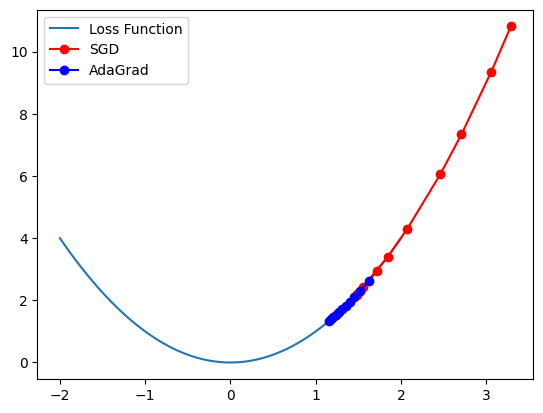

In [9]:
# SGD vs AdaGrad 시각화
sgd_history = sgd()
adagrad_history = adagrad()

x_vals = np.linspace(-2, 2, 100)

plt.plot(x_vals, loss(x_vals), label="Loss Function")
plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label="SGD")
plt.plot(adagrad_history, loss(np.array(adagrad_history)), 'bo-', label="AdaGrad")

plt.legend()
plt.show()

# AdaGrad는 점점 학습률이 줄어들게 됨

### RMSprop

In [10]:
# RMSprop 함수 만들기
def rmpsprop(lr=0.1, beta=0.9, epsilon=1e-8, epochs=10):   # RMSprop는 베타값 추가
    # 랜덤한 값으로 가중치 초기화
    w = np.random.uniform(-2, 2)

    h = 0               # 이전 기울기의 영향을 받기 때문에 새로 초기화
    history = [w]

    # 폭 만큼 반복
    for _ in range(epochs):
        grad = gradient(w)      # 가중치로 기울기 계산
        h += (beta * h) + ((1 - beta) * grad ** 2)      # AdaGrad랑 살짝 달라짐. 최근 기울기의 크기를 지수적으로 가중
        w -= (lr / (np.sqrt(h) + epsilon)) * grad       # 이전 기울기를 이용해서 기울기 업데이트 (기울기 이동이 많으면 많을수록 학습률이 줄어듦)
        history.append(w)

    return history

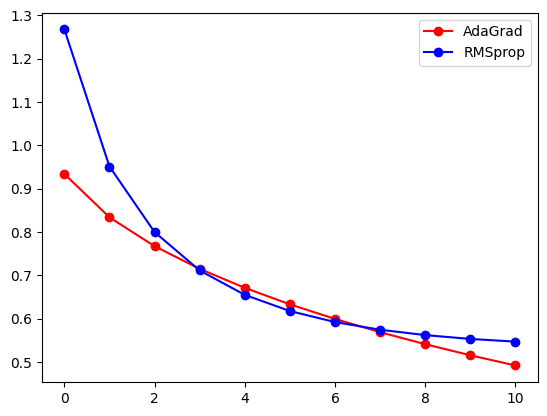

In [11]:
# AdaGrad vs RMSprop 차이 시각화
adagrad_history = adagrad()
rmpsprop_history = rmpsprop()

# 횟수에 따른 가중치 변화
plt.plot(range(11), adagrad_history, 'ro-', label="AdaGrad")
plt.plot(range(11), rmpsprop_history, 'bo-', label="RMSprop")

plt.legend()
plt.show()

# AdaGrad는 이전 기울기 영향을 받아가면서 어느 정도 비슷한 추세
# RMSprop는 변화의 차이, 최근 기울기 더 잘 반영

### Adam

In [12]:
# Adam 함수
def adam(lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=10):      # 두 가지의 베타값, 각각 기울기의 이동 평균, 기울기 제곱의 이동평균
    w = np.random.uniform(-2, 2)
    m, v = 0, 0
    history = [w]

    for t in range(1, epochs+1):
        grad = gradient(w)

        m = beta1 * m + (1 - beta1) * grad
        v = beta1 * v + (1 - beta2) * grad ** 2
        m_hat = m / (1 - beta1 ** t)    # 고정치로 편향 추가
        v_hat = v / (1 - beta2 ** t)
        w -= (lr / (np.sqrt(v_hat) + epsilon)) * m_hat

        history.append(w)

    return history

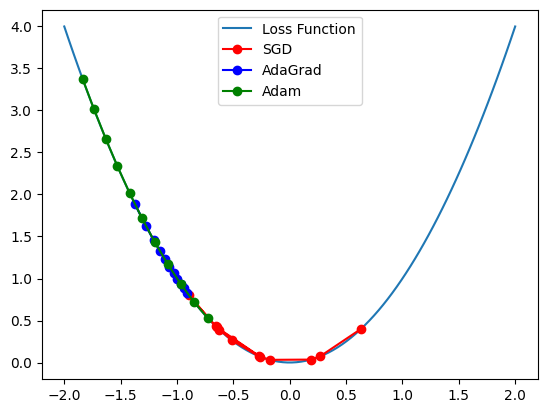

In [13]:
# SGD vs AdaGrad vs Adam 세 가지 비교 시각화
sgd_history = sgd()
adagrad_history = adagrad()
adam_history = adam()

x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label="Loss Function")

# 횟수에 따른 가중치 변화
plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label="SGD")
plt.plot(adagrad_history, loss(np.array(adagrad_history)), 'bo-', label="AdaGrad")
plt.plot(adam_history, loss(np.array(adam_history)), 'go-', label="Adam")

plt.legend()
plt.show()

# Adam은 안정적으로 수렴하면서 최적점에 가까워짐

### PyTorch 활용 > SGD vs Adam 비교

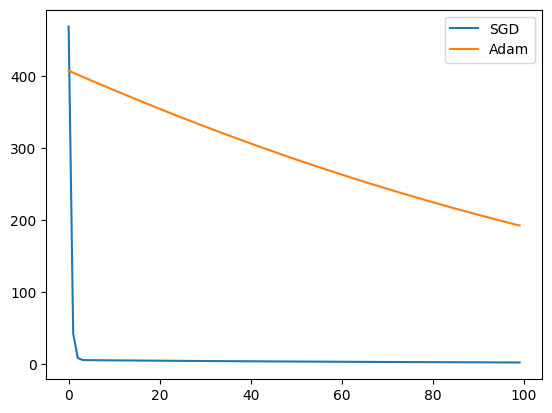

In [14]:
import torch 
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)     # torch의 난수 재현성 고정

X = torch.rand(100, 1) * 10                     # 노이즈도 살짝 추가
y = 3 * X + 5 + (torch.randn(100, 1) * 0.3)     

# 선형 모델
model_sgd = nn.Linear(1, 1)
model_adam = nn.Linear(1, 1)
# model_adam.load_state_dict(model_sgd)   # 초기값 같게 설정

# 손실 함수
criterion = nn.MSELoss()

# 옵티마이저
optim_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)
optim_adam = optim.Adam(model_adam.parameters(), lr=0.01)

# 학습 반복
epochs = 100
losses_sgd = []
losses_adam = []

# SGD 적용
for epoch in range(epochs):
    optim_sgd.zero_grad()           # 기울기 초기화
    outputs = model_sgd(X)          # 모델 통과해서 예측값 구하고
    loss = criterion(outputs, y)    # 손실 구하고
    loss.backward()                 # 역전파 시켜 기울기 계산
    optim_sgd.step()                # 가중치로 모델 파라미터 업데이트 ??
    losses_sgd.append(loss.item())  

# Adam 적용
for epoch in range(epochs):
    optim_adam.zero_grad()           # 기울기 초기화
    outputs = model_adam(X)          # 모델 통과해서 예측값 구하고
    loss = criterion(outputs, y)     # 손실 구하고
    loss.backward()                  # 역전파 시켜 기울기 계산
    optim_adam.step()                # 가중치로 모델 파라미터 업데이트 ??
    losses_adam.append(loss.item())  

# 시각화
plt.plot(losses_sgd, label="SGD")
plt.plot(losses_adam, label="Adam")
plt.legend()
plt.show()

# Adam은 꾸준히 우하향

# 종합 실습

In [15]:
# 이진 분류 정답 버전

# 1. 활성화 함수 및 손실 함수 정의
def relu(x):
    return np.maximum(0, x)

def relu_d(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-7)) / y_true.shape[0]

# 2. 학습 데이터 준비 (5x5 픽셀 숫자)
digits = {
    "0": np.array([[1, 1, 1, 1, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1]]).flatten(),
    "1": np.array([[0, 0, 1, 0, 0],
                   [0, 1, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 0]]).flatten()
}

X = np.array([digits["0"], digits["1"]])
y = np.array([[1, 0], [0, 1]])

# 3. 신경망 구조 설정
input_size = 25
hidden_size = 10
output_size = 2

# 가중치 초기화 (He 초기화)
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
b2 = np.zeros((1, output_size))

# 4. 학습 (역전파 + SGD 최적화)
learning_rate = 0.01
epochs = 1000

for epoch in range(epochs):
    # 순전파
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)

    # 손실 계산
    loss = cross_entropy_loss(y, A2)

    # 역전파
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / X.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_d(Z1)
    dW1 = np.dot(X.T, dZ1) / X.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]

    # 가중치 업데이트
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    # epoch 100번째마다 손실 출력
    if epoch % 100 == 0:
        print(f'Epoch { epoch }: Loss {loss:.4f}')

# 5. 예측 테스트
def predict(x):
    Z1 = np.dot(x, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return np.argmax(A2, axis=1)

test_digit = np.array([[0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0]]).flatten().reshape(1, -1)
print("예측 결과 값:", predict(test_digit))

Epoch 0: Loss 0.8958
Epoch 100: Loss 0.0831
Epoch 200: Loss 0.0344
Epoch 300: Loss 0.0203
Epoch 400: Loss 0.0140
Epoch 500: Loss 0.0105
Epoch 600: Loss 0.0084
Epoch 700: Loss 0.0069
Epoch 800: Loss 0.0059
Epoch 900: Loss 0.0051
예측 결과 값: [1]


In [16]:
# 다중 분류 정답 버전

# 1. 활성화 함수 및 손실 함수 정의
def relu(x):
    return np.maximum(0, x)

def relu_d(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-7)) / y_true.shape[0]

# 2. 학습 데이터 준비 (5x5 픽셀 숫자)
digits = {
    "0": np.array([[1, 1, 1, 1, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1]]).flatten(),
    "1": np.array([[0, 0, 1, 0, 0],
                   [0, 1, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 0]]).flatten(),
    "8": np.array([[1, 1, 1, 1, 1],
                   [1, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1],
                   [1, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1]]).flatten(),
}

X = np.array([digits["0"], digits["1"], digits["8"]])
y_labels = np.array([0, 1, 2])

# one-hot 인코딩
y = np.zeros((y_labels.size, 3))
y[np.arange(y_labels.size), y_labels] = 1

# 3. 신경망 구조 설정
input_size = 25
hidden_size = 10
output_size = 3

# 가중치 초기화 (He 초기화)
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
b2 = np.zeros((1, output_size))

# 4. 학습 (역전파 + SGD 최적화)
learning_rate = 0.01
epochs = 1000

for epoch in range(epochs):
    # 순전파
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)

    # 손실 계산
    loss = cross_entropy_loss(y, A2)

    # 역전파
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / X.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_d(Z1)
    dW1 = np.dot(X.T, dZ1) / X.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]

    # 가중치 업데이트
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    # epoch 100번째마다 손실 출력
    if epoch % 100 == 0:
        print(f'Epoch { epoch }: Loss {loss:.4f}')

# 5. 예측 테스트
def predict(x):
    Z1 = np.dot(x, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return np.argmax(A2, axis=1)

test_digit = np.array([[0, 1, 1, 1, 0],
                        [1, 0, 0, 0, 1],
                        [0, 1, 1, 1, 0],
                        [1, 0, 0, 0, 1],
                        [0, 1, 1, 1, 0]]).flatten().reshape(1, -1)
print("예측 결과 값:", ["0", "1", "8"][predict(test_digit)[0]])

Epoch 0: Loss 1.4315
Epoch 100: Loss 0.7551
Epoch 200: Loss 0.5269
Epoch 300: Loss 0.3206
Epoch 400: Loss 0.1874
Epoch 500: Loss 0.1188
Epoch 600: Loss 0.0814
Epoch 700: Loss 0.0595
Epoch 800: Loss 0.0457
Epoch 900: Loss 0.0365
예측 결과 값: 8
